<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/NB_Claim_Prediction_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify file path
file_path = '/content/drive/My Drive/telematics_syn.csv'

# Import pandas (assuming you want to use it to read the CSV)
import pandas as pd

# Read the CSV file
data = pd.read_csv(file_path)

# Print the DataFrame
print(data)

Mounted at /content/drive
       Duration  Insured.age Insured.sex  Car.age  Marital     Car.use  \
0           366           45        Male       -1  Married     Commute   
1           182           44      Female        3  Married     Commute   
2           184           48      Female        6  Married     Commute   
3           183           71        Male        6  Married     Private   
4           183           84        Male       10  Married     Private   
...         ...          ...         ...      ...      ...         ...   
99995       182           61        Male       10   Single     Private   
99996       192           48        Male        3  Married     Commute   
99997       184           50        Male        2   Single     Commute   
99998       184           76        Male        2  Married     Private   
99999       365           25      Female        2   Single  Commercial   

       Credit.score Region  Annual.miles.drive  Years.noclaims  ...  \
0             

In [ ]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
import torch

In [ ]:
# Split data into features and target
X = data.drop('NB_Claim', axis=1)
y = data['NB_Claim']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Categorical columns: Index(['Insured.sex', 'Marital', 'Car.use', 'Region'], dtype='object')
Numerical columns: Index(['Duration', 'Insured.age', 'Car.age', 'Credit.score',
       'Annual.miles.drive', 'Years.noclaims', 'Territory',
       'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
       'Pct.drive.tue', 'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri',
       'Pct.drive.sat', 'Pct.drive.sun', 'Pct.drive.2hrs', 'Pct.drive.3hrs',
       'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.wkend',
       'Pct.drive.rush am', 'Pct.drive.rush pm', 'Avgdays.week',
       'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles',
       'Accel.12miles', 'Accel.14miles', 'Brake.06miles', 'Brake.08miles',
       'Brake.09miles', 'Brake.11miles', 'Brake.12miles', 'Brake.14miles',
       'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.inten

Evaluating Logistic Regression...
Evaluating XGBoost...
Evaluating TabNet...
epoch 0  | loss: 0.42521 |  0:00:22s
epoch 1  | loss: 0.11671 |  0:00:44s
epoch 2  | loss: 0.07337 |  0:01:08s
epoch 3  | loss: 0.05632 |  0:01:29s
epoch 4  | loss: 0.04722 |  0:01:53s
epoch 5  | loss: 0.04163 |  0:02:16s
epoch 6  | loss: 0.04639 |  0:02:39s
epoch 7  | loss: 0.03916 |  0:03:02s
epoch 8  | loss: 0.02995 |  0:03:25s
epoch 9  | loss: 0.02997 |  0:03:47s
epoch 10 | loss: 0.03023 |  0:04:10s
epoch 11 | loss: 0.2474  |  0:04:32s
epoch 12 | loss: 0.08841 |  0:04:54s
epoch 13 | loss: 0.05202 |  0:05:16s
epoch 14 | loss: 0.04427 |  0:05:37s
epoch 15 | loss: 0.03762 |  0:05:59s
epoch 16 | loss: 0.03668 |  0:06:21s
epoch 17 | loss: 0.03425 |  0:06:44s
epoch 18 | loss: 0.038   |  0:07:08s
epoch 19 | loss: 0.06956 |  0:07:31s
epoch 20 | loss: 0.24987 |  0:07:54s
epoch 21 | loss: 0.13719 |  0:08:17s
epoch 22 | loss: 0.06653 |  0:08:40s
epoch 23 | loss: 0.0528  |  0:09:02s
epoch 24 | loss: 0.0425  |  0:09:25

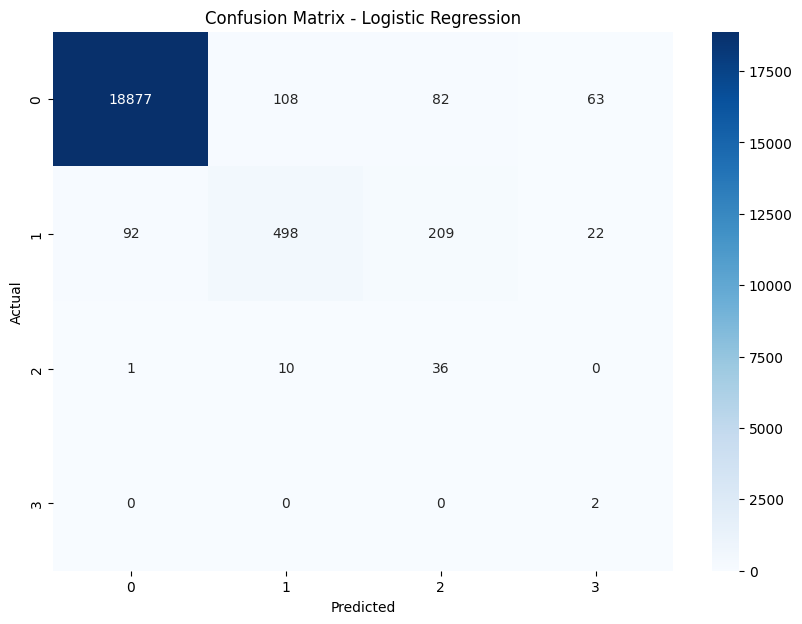

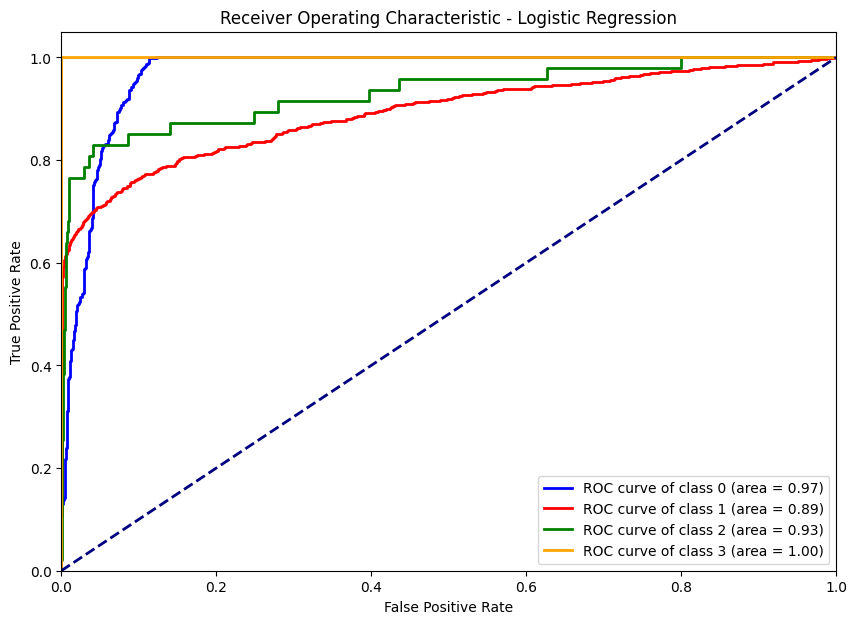

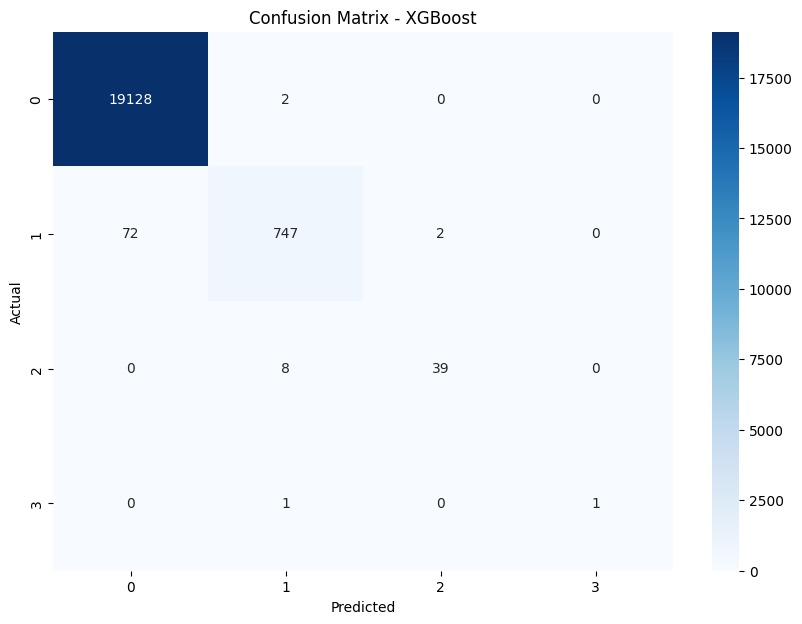

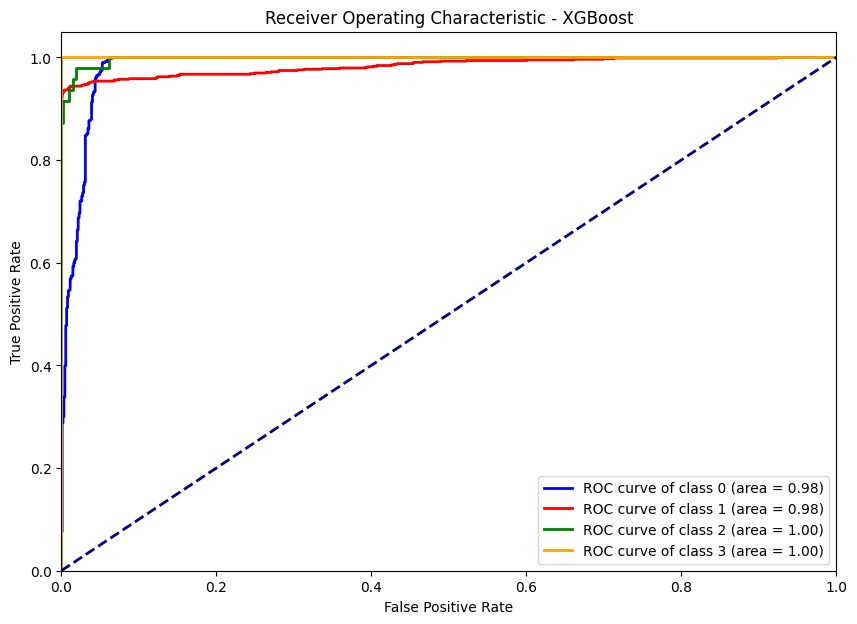

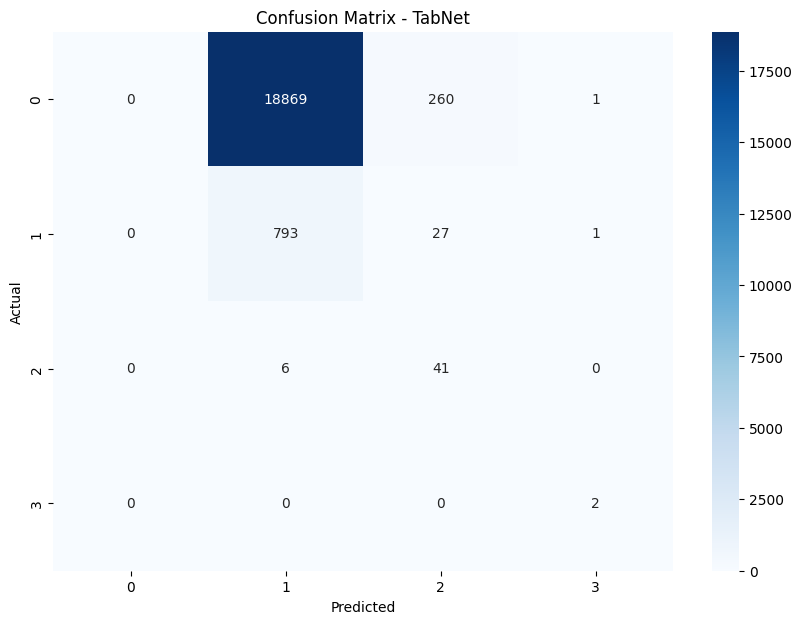

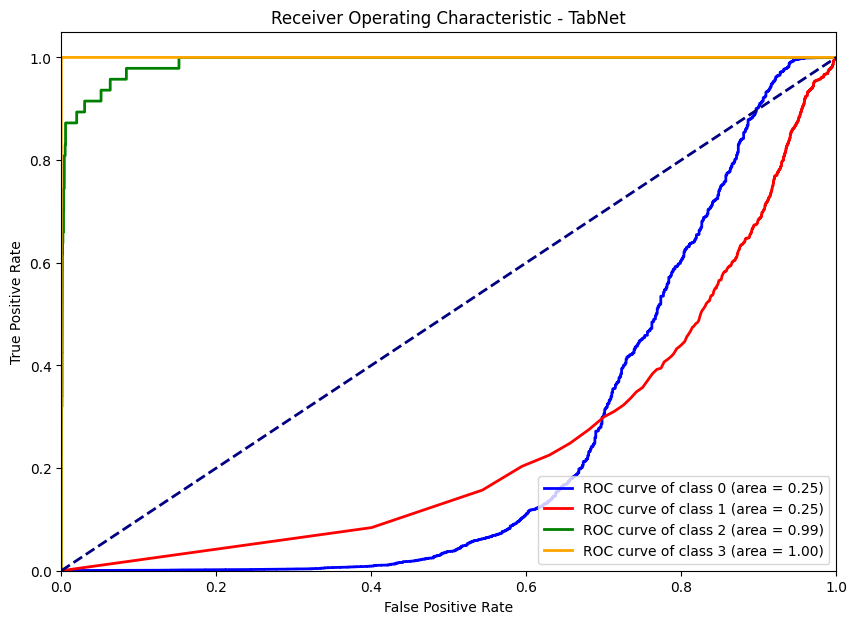

Final Comparative Analysis Results:
                 Model  Accuracy  Precision   Recall  F1 Score   ROC AUC  \
0  Logistic Regression   0.97065   0.985258  0.97065  0.976723  0.966756   
1              XGBoost   0.99575   0.995703  0.99575  0.995643  0.984649   
2               TabNet   0.04180   0.001999  0.04180  0.003758  0.247985   

        MCC       Loss  
0  0.683038   0.353157  
1  0.947907   0.022783  
2  0.026687  15.212480  


In [ ]:
# Ensure necessary imports
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, matthews_corrcoef, log_loss, confusion_matrix, roc_curve
)
from sklearn.multiclass import OneVsRestClassifier

# Ignore warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = '/content/drive/My Drive/telematics_syn.csv'
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop('NB_Claim', axis=1)
y = data['NB_Claim']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'TabNet': TabNetClassifier(
        verbose=1,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax'
    )
}

models = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression(max_iter=1000)),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob'),
    'TabNet': TabNetClassifier(
        verbose=1,
        optimizer_params=dict(lr=2e-2),
        scheduler_params={"step_size":10, "gamma":0.9},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax'
    )
}
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # For multi-class problems, we need probabilities for each class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = np.eye(len(np.unique(y_test)))[y_pred]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    loss = log_loss(y_test, y_prob)

    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'mcc': mcc,
        'loss': loss,
        'conf_matrix': conf_matrix
    }
# Initial testing with raw data
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    metrics = evaluate_model(model, X_train_res, X_test, y_train_res, y_test)
    results[name] = metrics

print("\nInitial Model Performance with Raw Data and Default Hyperparameters:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        if metric not in ['conf_matrix', 'fpr', 'tpr']:
            print(f"  {metric}: {value:.4f}")
    print()

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
# Function to plot ROC curve
def plot_roc_curve(y_test, y_prob, title):
    n_classes = y_prob.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    colors = ['blue', 'red', 'green', 'orange']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {title}')
    plt.legend(loc="lower right")
    plt.show()

# When plotting ROC curves
for name, metrics in results.items():
    plot_confusion_matrix(metrics['conf_matrix'], name)
    plot_roc_curve(y_test, models[name].predict_proba(X_test), name)


# Combine all results into a final DataFrame for comparison
final_results = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1 Score': [results[name]['f1'] for name in results],
    'ROC AUC': [results[name]['roc_auc'] for name in results],
    'MCC': [results[name]['mcc'] for name in results],
    'Loss': [results[name]['loss'] for name in results]
})

print("Final Comparative Analysis Results:")
print(final_results)

epoch 0  | loss: 0.42521 |  0:00:23s
epoch 1  | loss: 0.11671 |  0:00:44s
epoch 2  | loss: 0.07337 |  0:01:06s
epoch 3  | loss: 0.05632 |  0:01:28s
epoch 4  | loss: 0.04722 |  0:01:51s
epoch 5  | loss: 0.04163 |  0:02:13s
epoch 6  | loss: 0.04639 |  0:02:35s
epoch 7  | loss: 0.03916 |  0:02:58s
epoch 8  | loss: 0.02995 |  0:03:22s
epoch 9  | loss: 0.02997 |  0:03:46s
epoch 10 | loss: 0.03023 |  0:04:08s
epoch 11 | loss: 0.2474  |  0:04:31s
epoch 12 | loss: 0.08841 |  0:04:53s
epoch 13 | loss: 0.05202 |  0:05:16s
epoch 14 | loss: 0.04427 |  0:05:38s
epoch 15 | loss: 0.03762 |  0:06:02s
epoch 16 | loss: 0.03668 |  0:06:24s
epoch 17 | loss: 0.03425 |  0:06:47s
epoch 18 | loss: 0.038   |  0:07:09s
epoch 19 | loss: 0.06956 |  0:07:31s
epoch 20 | loss: 0.24987 |  0:07:54s
epoch 21 | loss: 0.13719 |  0:08:17s
epoch 22 | loss: 0.06653 |  0:08:40s
epoch 23 | loss: 0.0528  |  0:09:02s
epoch 24 | loss: 0.0425  |  0:09:25s
epoch 25 | loss: 0.04128 |  0:09:46s
epoch 26 | loss: 0.03745 |  0:10:11s
e

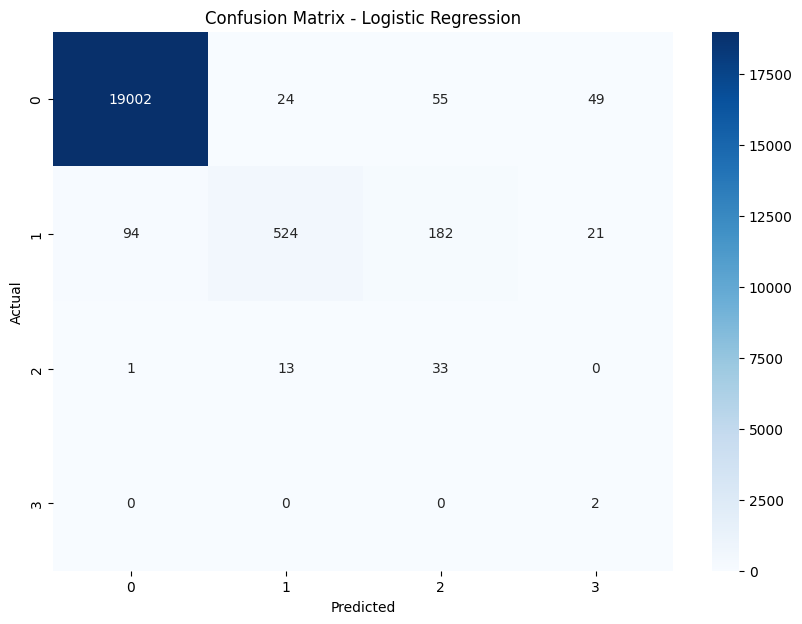

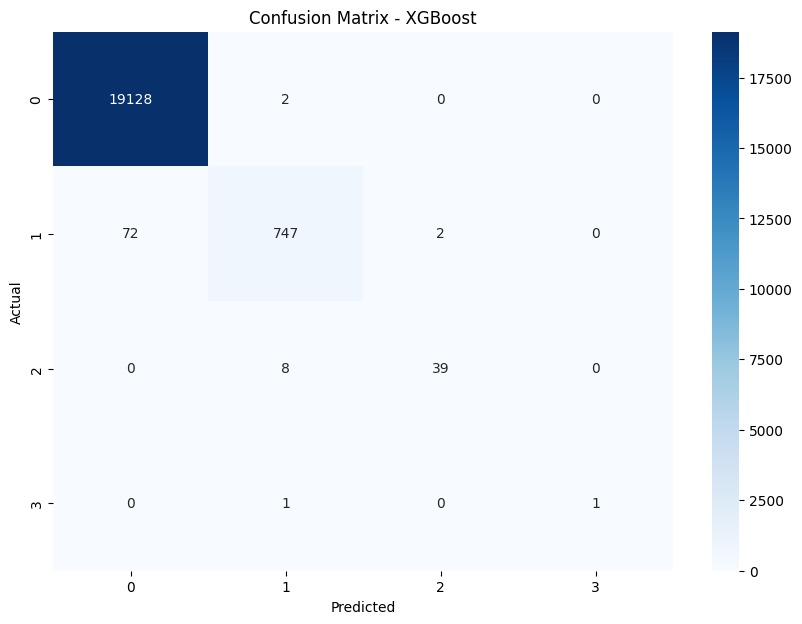

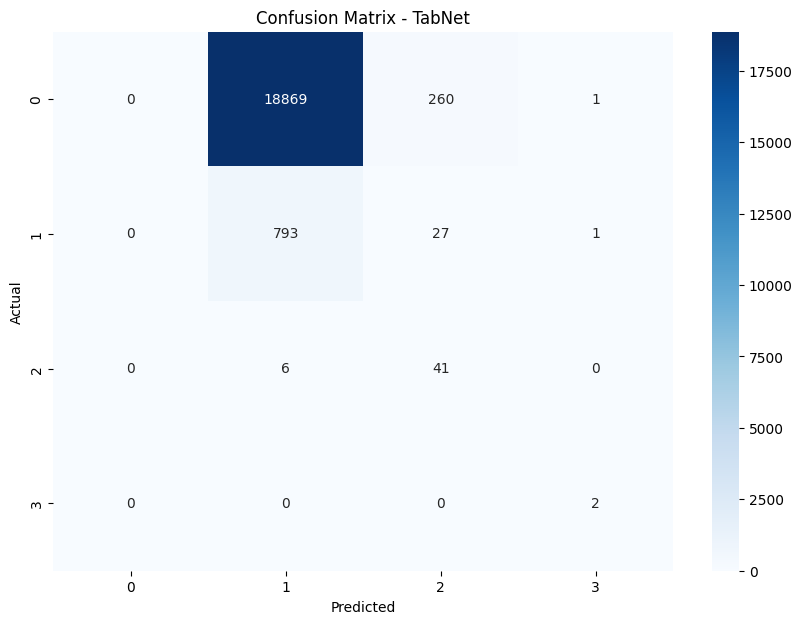

Final Comparative Analysis Results:
                 Model  Accuracy  Precision   Recall  F1 Score   ROC AUC  \
0  Logistic Regression   0.97805   0.990374  0.97805  0.982544  0.975474   
1              XGBoost   0.99575   0.995703  0.99575  0.995643  0.991471   
2               TabNet   0.04180   0.001999  0.04180  0.003758  0.621004   

        MCC       Loss  
0  0.744815   0.110840  
1  0.947907   0.022783  
2  0.026687  15.212480  


In [ ]:
# Necessary imports
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, log_loss, confusion_matrix
)
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = '/content/drive/My Drive/telematics_syn.csv'
data = pd.read_csv(file_path)

# Split data into features and target
X = data.drop('NB_Claim', axis=1)
y = data['NB_Claim']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'TabNet': TabNetClassifier(verbose=1, optimizer_params=dict(lr=2e-2), scheduler_params={"step_size":10, "gamma":0.9}, scheduler_fn=torch.optim.lr_scheduler.StepLR, mask_type='entmax')
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if model has predict_proba method
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        if y_prob.ndim == 2 and y_prob.shape[1] > 1:  # Multi-class case
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        else:  # Binary case
            y_prob = y_prob[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
    else:
        y_prob = y_pred
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if len(np.unique(y_test)) > 2 else roc_auc_score(y_test, y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    loss = log_loss(y_test, y_prob)

    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'mcc': mcc,
        'loss': loss,
        'conf_matrix': conf_matrix
    }

# Initial testing with raw data
results = {}
for name, model in models.items():
    metrics = evaluate_model(model, X_train_res, X_test, y_train_res, y_test)
    results[name] = metrics

print("Initial Model Performance with Raw Data and Default Hyperparameters:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot results for Logistic Regression
plot_confusion_matrix(results['Logistic Regression']['conf_matrix'], 'Logistic Regression')

# Plot results for XGBoost
plot_confusion_matrix(results['XGBoost']['conf_matrix'], 'XGBoost')

# Plot results for TabNet
plot_confusion_matrix(results['TabNet']['conf_matrix'], 'TabNet')

# Combine all results into a final DataFrame for comparison
final_results = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results],
    'Precision': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1 Score': [results[name]['f1'] for name in results],
    'ROC AUC': [results[name]['roc_auc'] for name in results],
    'MCC': [results[name]['mcc'] for name in results],
    'Loss': [results[name]['loss'] for name in results]
})

print("Final Comparative Analysis Results:")
print(final_results)


# last step

## optimizing TabNet's performance and exploring new DL architectures for insurance applications.